In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import metrics
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')
import config


<IPython.core.display.Javascript object>

In [12]:
postgres_user = config.user
postgres_pw = config.password
postgres_host = config.host
postgres_port = config.port
postgres_db = "heartdisease"

engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

df = pd.read_sql_query("select * from heartdisease", con=engine)

# No need for an open connection,
# because you're only doing a single query
engine.dispose()

<IPython.core.display.Javascript object>

In [13]:
# Define the features and the outcome
X = df.iloc[:, :13]
y = df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace="?", value=0)

# make y binary
y = np.where(y > 0, 0, 1)

# Scale the data
scaler = StandardScaler()
scaled = scaler.fit_transform(X)

<IPython.core.display.Javascript object>

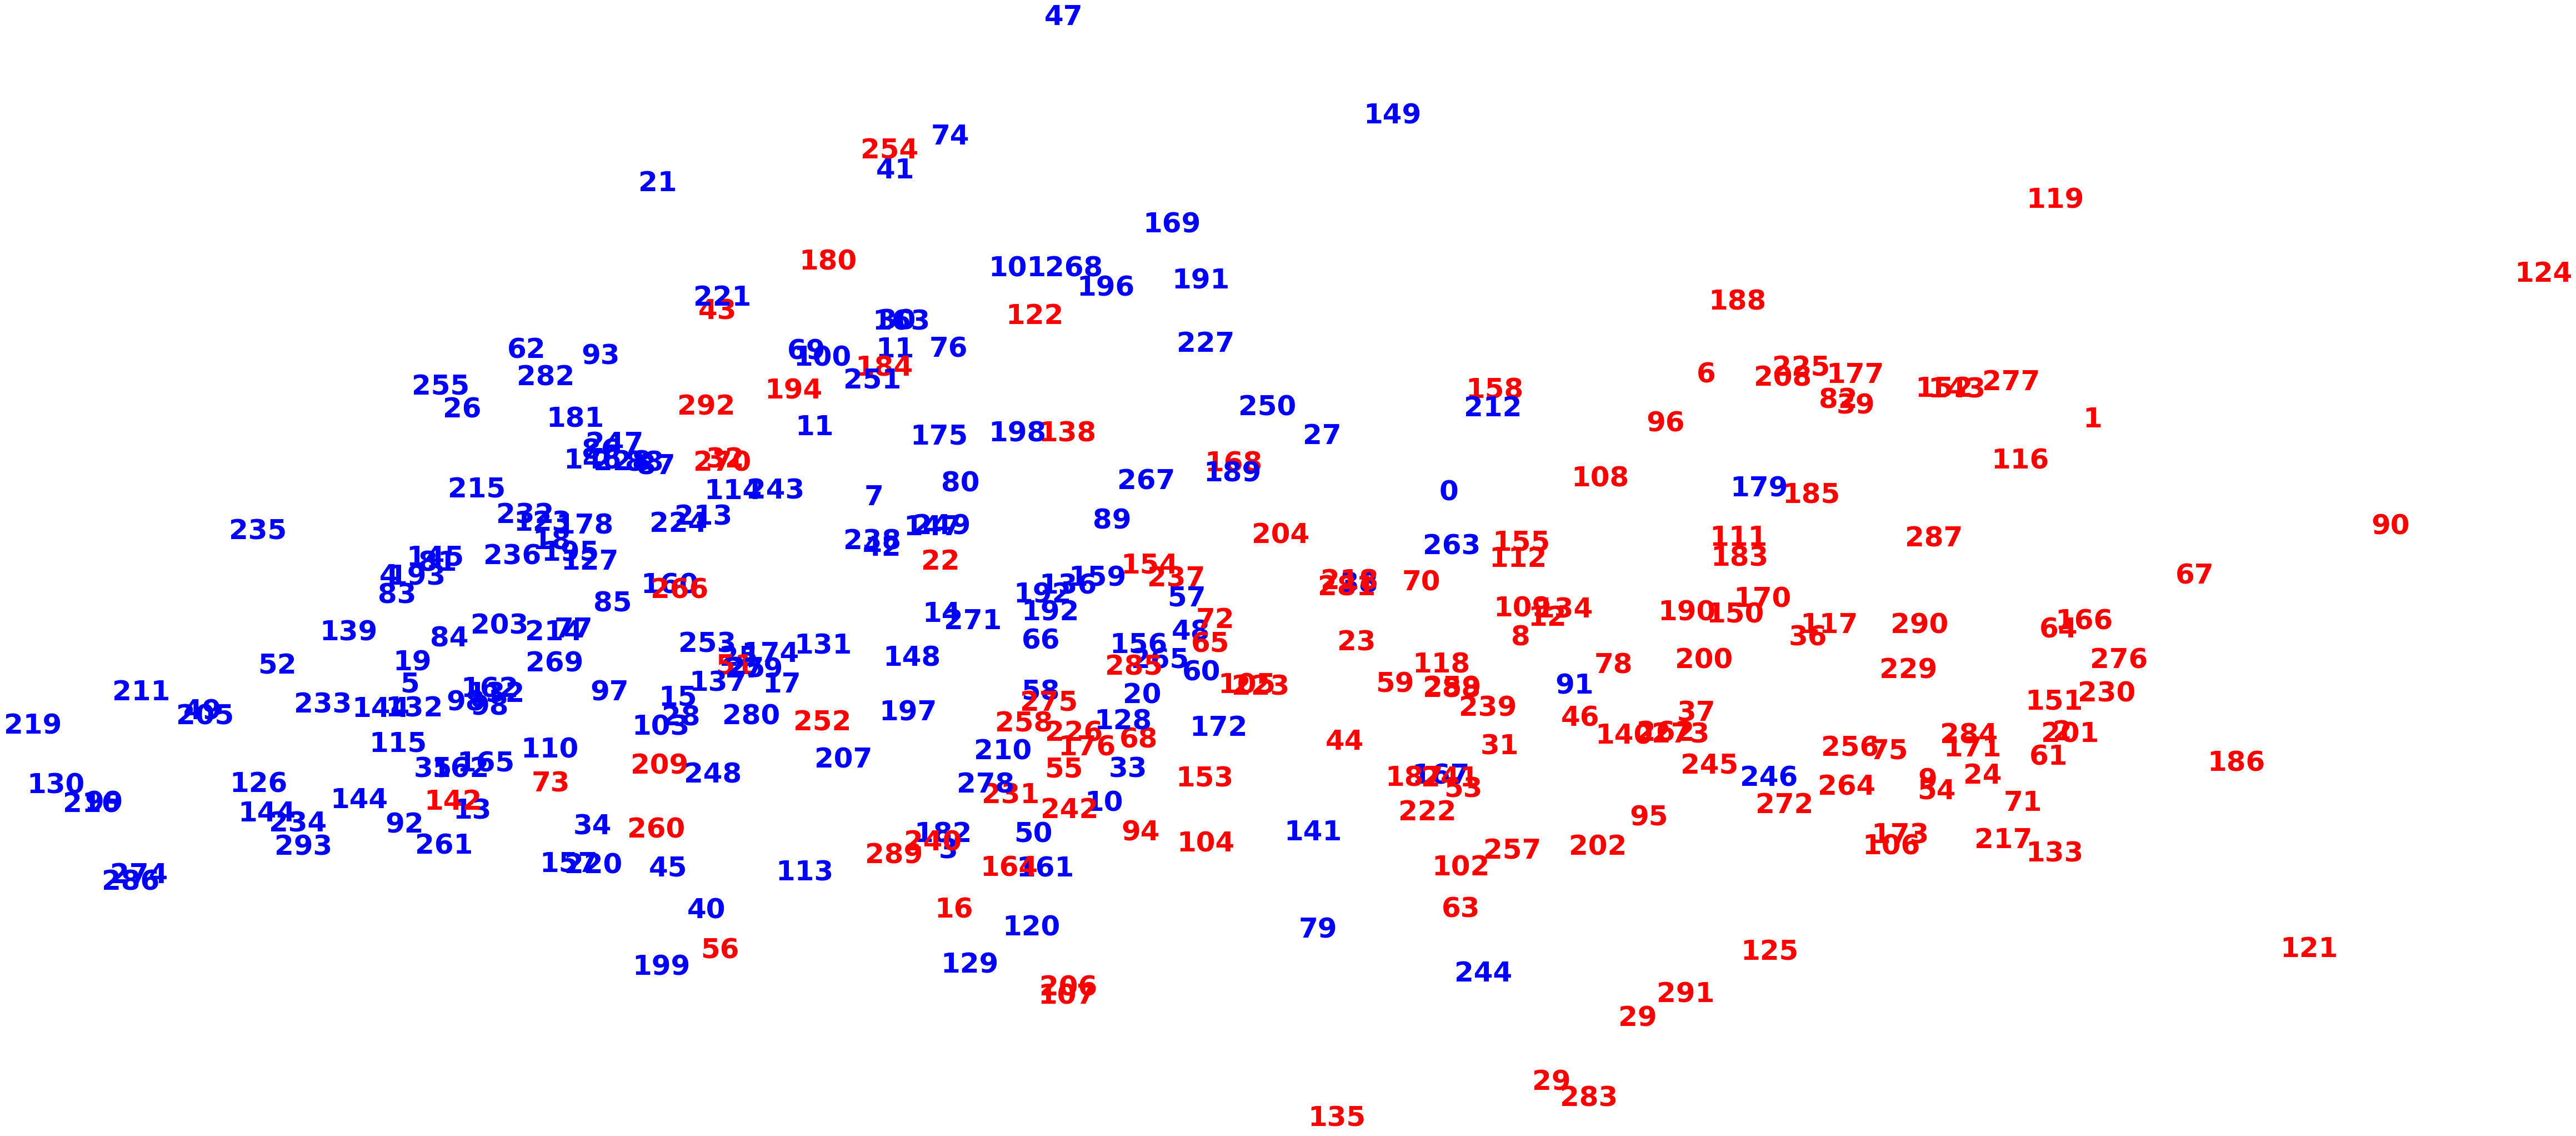

<IPython.core.display.Javascript object>

In [14]:
dbscan = DBSCAN(eps=1, min_samples=1, metric="euclidean")

clusters = dbscan.fit_predict(scaled)

pca = PCA(n_components=2).fit_transform(scaled)

plt.figure(figsize=(10, 5))
colours = "rbgrg"
for i in range(pca.shape[0]):
    plt.text(
        pca[i, 0],
        pca[i, 1],
        str(clusters[i]),
        color=colours[y[i]],
        fontdict={"weight": "bold", "size": 50},
    )

plt.xticks()
plt.yticks()
plt.axis("off")
plt.show()

### 2. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of min_samples. What's the effect of increasing min_samples on the number of clusters DBSCAN identifies?

In [19]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(scaled)

print("Quantity of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

for i in range(2, 51):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(scaled)
    print(
        "Quantity of clusters when min_samples={} is: {}".format(
            i, len(np.unique(clusters))
        )
    )

Quantity of clusters when min_samples=1 is: 294
Quantity of clusters when min_samples=2 is: 9
Quantity of clusters when min_samples=3 is: 2
Quantity of clusters when min_samples=4 is: 1
Quantity of clusters when min_samples=5 is: 1
Quantity of clusters when min_samples=6 is: 1
Quantity of clusters when min_samples=7 is: 1
Quantity of clusters when min_samples=8 is: 1
Quantity of clusters when min_samples=9 is: 1
Quantity of clusters when min_samples=10 is: 1
Quantity of clusters when min_samples=11 is: 1
Quantity of clusters when min_samples=12 is: 1
Quantity of clusters when min_samples=13 is: 1
Quantity of clusters when min_samples=14 is: 1
Quantity of clusters when min_samples=15 is: 1
Quantity of clusters when min_samples=16 is: 1
Quantity of clusters when min_samples=17 is: 1
Quantity of clusters when min_samples=18 is: 1
Quantity of clusters when min_samples=19 is: 1
Quantity of clusters when min_samples=20 is: 1
Quantity of clusters when min_samples=21 is: 1
Quantity of clusters

<IPython.core.display.Javascript object>

Number of clusters seems to decrease min_samples increases

### 3. Apply DBSCAN by setting parameters eps=1, min_samples=1, metric="euclidean". Then, increase the value of eps. What's the effect of increasing eps on the number of clusters DBSCAN identifies?

In [21]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(scaled)

print("Quantity of clusters when eps=1 is: {}".format(len(np.unique(clusters))))

for i in [0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(scaled)
    print("Quantity of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))

Quantity of clusters when eps=1 is: 294
Quantity of clusters when eps=0.01 is: 303
Quantity of clusters when eps=0.1 is: 303
Quantity of clusters when eps=1 is: 294
Quantity of clusters when eps=2 is: 178
Quantity of clusters when eps=3 is: 34
Quantity of clusters when eps=4 is: 3
Quantity of clusters when eps=5 is: 1
Quantity of clusters when eps=6 is: 1
Quantity of clusters when eps=7 is: 1
Quantity of clusters when eps=8 is: 1
Quantity of clusters when eps=9 is: 1
Quantity of clusters when eps=10 is: 1


<IPython.core.display.Javascript object>

The quantity of cluster decreases as epsilon increases.